In [283]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pandas_profiling as pp
import pprint


warnings.filterwarnings('ignore')
%matplotlib inline


print(os.curdir)
print(os.listdir("input"))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))



.
['test.csv', 'train.csv', 'gender_submission.csv']


In [419]:
# 特徴量作成

# 基準となる関数
def read_data():
    train = pd.read_csv('input/train.csv')
    test = pd.read_csv('input/test.csv')
    data = pd.concat([train, test], ignore_index=True, sort=False).copy()

    return data, train, test

# pclass： 旅客クラス（1＝1等、2＝2等、3＝3等）。裕福さの目安となる
# name： 乗客の名前
# sex： 性別（male＝男性、female＝女性）
# age： 年齢。一部の乳児は小数値
# sibsp： タイタニック号に同乗している兄弟（Siblings）や配偶者（Spouses）の数
# parch： タイタニック号に同乗している親（Parents）や子供（Children）の数
# ticket： チケット番号
# fare： 旅客運賃
# cabin： 客室番号
# embarked： 出港地（
#     S＝Southampton：サウサンプトン{イギリス南部の港町、タイタニックの母港}: 1日目: 644人）
#     C＝Cherbourg：シェルブール{フランスの古い港町}: 2日目: 168人、
#     Q＝Queenstown：クイーンズタウン{アイルランドの古い寄港町（現在のコーブ）}: 2日目: 77人、
# boat： 救命ボート番号
# body： 遺体収容時の識別番号
# home.dest： 自宅または目的地
# survived：生存状況（0＝死亡、1＝生存）。通常はこの数値が目的変数として使われる


def data_mod_basic(data):
    data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
    data['Embarked'].fillna(('S'), inplace=True) # ２つ欠損なので出港地のSとする
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

    categorical_features = ['Embarked', 'Pclass', 'Sex']

    return data, categorical_features


# 本のサンプル通り
def func_41_tidycol_base():
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    print(data.columns)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone'])

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)


# データの列を整理したパターン
def func_42_tidycol_tidy():
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize'])
    categorical_features = ['Pclass', 'Sex']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)


# Cabinの先頭１文字を考慮したパターン
def func_43_tidycol_with_cabin_prefix():
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Cabin_prefix'])
    categorical_features = ['Pclass', 'Sex', 'Cabin_prefix']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)

# Cabinの先頭１文字を考慮したパターン+Embarked
def func_44_tidycol_with_cabin_prefix_with_embarked():
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize', 'Cabin_prefix'])
    categorical_features = ['Pclass', 'Sex', 'Cabin_prefix', 'Embarked']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)

# Cabinの先頭１文字を考慮したパターン+Embarked+Fare
def func_45_tidycol_with_cabin_prefix_with_embarked_with_fare():
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize', 'Cabin_prefix'])
    categorical_features = ['Pclass', 'Sex', 'Cabin_prefix', 'Embarked']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)


# 上記でSuvivedに対して特徴が多いものをピックアップ
def func_46_tidycol_many_correlation():
    #  相関の大きさ：  A pclass,  A sex, C  Age, A SibSp, A Parch, A FamilySize, A  Fare, A embarked, A IsAlone, A Cabin_prefix
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked', 'IsAlone', 'Cabin_prefix'])
    categorical_features = ['Pclass', 'Sex', 'Cabin_prefix', 'Embarked']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)


# 上記でSuvivedに対して特徴が多いものをピックアップ
def func_47_tidycol_many_correlation_with_sibsp_parch():
    #  相関の大きさ：  A pclass,  A sex, C  Age, A SibSp, A Parch, A FamilySize, A  Fare, A embarked, A IsAlone, A Cabin_prefix
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Embarked', 'IsAlone', 'Cabin_prefix'])
    categorical_features = ['Pclass', 'Sex', 'Cabin_prefix', 'Embarked']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)


# 上記でSuvivedに対して特徴が多いものをピックアップ（カテゴリーをふやした）
def func_48_tidycol_many_correlation_cate_plus():
    #  相関の大きさ：  A pclass,  A sex, C  Age, A SibSp, A Parch, A FamilySize, A  Fare, A embarked, A IsAlone, A Cabin_prefix
    data, train, test = read_data()

    data, categorical_features = data_mod_basic(data)

    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked', 'IsAlone', 'Cabin_prefix'])
    categorical_features = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Embarked', 'IsAlone', 'Cabin_prefix']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)


# 上記でSuvivedに対して特徴が多いものをピックアップ（カテゴリーをふやした）
def func_49_tidycol_many_correlation_cate_plus_b():
    #  相関の大きさ：  A pclass,  A sex, C  Age, A SibSp, A Parch, A FamilySize, A  Fare, A embarked, A IsAlone, A Cabin_prefix
    data, train, test = read_data()
    data, categorical_features = data_mod_basic(data)

    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked', 'IsAlone', 'Cabin_prefix'])
    categorical_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone', 'Cabin_prefix']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)


# 上記でSuvivedに対して特徴が多いものをピックアップ（カテゴリーをふやした）
def func_50_tidycol_qiita():

    # Age を Pclass, Sex, Parch, SibSp からランダムフォレストで推定
    def get_predicted_ages(df, train, test):
        # 推定に使用する項目を指定
        age_df = df[['Age', 'Pclass','Sex','Parch','SibSp']]
        # ラベル特徴量をワンホットエンコーディング
        age_df=pd.get_dummies(age_df)
        # 学習データとテストデータに分離し、numpyに変換
        known_age = age_df[age_df.Age.notnull()].values  
        unknown_age = age_df[age_df.Age.isnull()].values
        # 学習データをX, yに分離
        X = known_age[:, 1:]  
        y = known_age[:, 0]
        # ランダムフォレストで推定モデルを構築
        rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
        rfr.fit(X, y)
        # 推定モデルを使って、テストデータのAgeを予測し、補完
        predicted_ages = rfr.predict(unknown_age[:, 1::])
        return predicted_ages

    
    data, train, test = read_data()
    Ticket_Count = dict(data['Ticket'].value_counts())
    data['TicketGroup'] = data['Ticket'].map(Ticket_Count)
    # 人数が2〜4人の生存率が高く、5〜8人と1人の生存率が中位、11人の生存率はゼロです。従って、3つにグルーピングします。
    data.loc[(data['TicketGroup']>=2) & (data['TicketGroup']<=4), 'Ticket_label'] = 2
    data.loc[(data['TicketGroup']>=5) & (data['TicketGroup']<=8) | (data['TicketGroup']==1), 'Ticket_label'] = 1  
    data.loc[(data['TicketGroup']>=11), 'Ticket_label'] = 0

    # NameからSurname(苗字)を抽出
    # 同じSurname(苗字)の出現頻度をカウント(出現回数が2以上なら家族)
    data['Surname'] = data['Name'].map(lambda name:name.split(',')[0].strip())
    data['FamilyGroup'] = data['Surname'].map(data['Surname'].value_counts()) 
    # 家族で16才以下または女性の生存率
    Female_Child_Group=data.loc[(data['FamilyGroup']>=2) & ((data['Age']<=16) | (data['Sex']=='female'))]
    Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
    # 家族で16才超えかつ男性の生存率
    Male_Adult_Group=data.loc[(data['FamilyGroup']>=2) & (data['Age']>16) & (data['Sex']=='male')]
    Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
    # デッドリストとサバイブリストの作成
    Dead_list=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
    Survived_list=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)

    # デッドリストとサバイブリストの表示
    print('Dead_list = ', Dead_list)
    print('Survived_list = ', Survived_list)

    # デッドリストとサバイブリストをSex, Age, Title に反映させる
    data.loc[(data['Survived'].isnull()) & (data['Surname'].apply(lambda x:x in Dead_list)),\
                 ['Sex','Age','Title']] = ['male',28.0,'Mr']
    data.loc[(data['Survived'].isnull()) & (data['Surname'].apply(lambda x:x in Survived_list)),\
                 ['Sex','Age','Title']] = ['female',5.0,'Mrs']

    data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
    data['Embarked'].fillna(('S'), inplace=True) # ２つ欠損なので出港地のSとする
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    # 欠損値を Embarked='S', Pclass=3 の平均値で補完
    fare=data.loc[(data['Embarked'] == 'S') & (data['Pclass'] == 3), 'Fare'].median()
    data['Fare']=data['Fare'].fillna(fare)
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
    data.loc[data.loc[:,"Age"].isnull(), 'Age'] = get_predicted_ages(data, train, test) 
    
    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
    data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked','Cabin_prefix', 'Ticket_label'])
    categorical_features = ['Pclass', 'Sex', 'Embarked', 'Cabin_prefix', 'Ticket_label']

    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)




# 上記でSuvivedに対して特徴が多いものをピックアップ（カテゴリーをふやした）
def func_51_tidycol_qiita_full():

    # Age を Pclass, Sex, Parch, SibSp からランダムフォレストで推定
    def get_predicted_ages(df, train, test):
        # 推定に使用する項目を指定
        age_df = df[['Age', 'Pclass','Sex','Parch','SibSp']]
        # ラベル特徴量をワンホットエンコーディング
        age_df=pd.get_dummies(age_df)
        # 学習データとテストデータに分離し、numpyに変換
        known_age = age_df[age_df.Age.notnull()].values  
        unknown_age = age_df[age_df.Age.isnull()].values
        # 学習データをX, yに分離
        X = known_age[:, 1:]  
        y = known_age[:, 0]
        # ランダムフォレストで推定モデルを構築
        rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
        rfr.fit(X, y)
        # 推定モデルを使って、テストデータのAgeを予測し、補完
        predicted_ages = rfr.predict(unknown_age[:, 1::])
        return predicted_ages

    
    data, train, test = read_data()
    Ticket_Count = dict(data['Ticket'].value_counts())
    data['TicketGroup'] = data['Ticket'].map(Ticket_Count)
    # 人数が2〜4人の生存率が高く、5〜8人と1人の生存率が中位、11人の生存率はゼロです。従って、3つにグルーピングします。
    data.loc[(data['TicketGroup']>=2) & (data['TicketGroup']<=4), 'Ticket_label'] = 2
    data.loc[(data['TicketGroup']>=5) & (data['TicketGroup']<=8) | (data['TicketGroup']==1), 'Ticket_label'] = 1  
    data.loc[(data['TicketGroup']>=11), 'Ticket_label'] = 0

    # NameからSurname(苗字)を抽出
    # 同じSurname(苗字)の出現頻度をカウント(出現回数が2以上なら家族)
    data['Surname'] = data['Name'].map(lambda name:name.split(',')[0].strip())
    data['FamilyGroup'] = data['Surname'].map(data['Surname'].value_counts()) 
    # 家族で16才以下または女性の生存率
    Female_Child_Group=data.loc[(data['FamilyGroup']>=2) & ((data['Age']<=16) | (data['Sex']=='female'))]
    Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
    # 家族で16才超えかつ男性の生存率
    Male_Adult_Group=data.loc[(data['FamilyGroup']>=2) & (data['Age']>16) & (data['Sex']=='male')]
    Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
    # デッドリストとサバイブリストの作成
    Dead_list=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
    Survived_list=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)

    # デッドリストとサバイブリストの表示
    print('Dead_list = ', Dead_list)
    print('Survived_list = ', Survived_list)

    # デッドリストとサバイブリストをSex, Age, Title に反映させる
    data.loc[(data['Survived'].isnull()) & (data['Surname'].apply(lambda x:x in Dead_list)),\
                 ['Sex','Age','Title']] = ['male',28.0,'Mr']
    data.loc[(data['Survived'].isnull()) & (data['Surname'].apply(lambda x:x in Survived_list)),\
                 ['Sex','Age','Title']] = ['female',5.0,'Mrs']

    data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
    data['Embarked'].fillna(('S'), inplace=True) # ２つ欠損なので出港地のSとする
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    # 欠損値を Embarked='S', Pclass=3 の平均値で補完
    fare=data.loc[(data['Embarked'] == 'S') & (data['Pclass'] == 3), 'Fare'].median()
    data['Fare']=data['Fare'].fillna(fare)
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
    data.loc[data.loc[:,"Age"].isnull(), 'Age'] = get_predicted_ages(data, train, test) 
    
    data['Cabin_prefix'] = data['Cabin'].str[:1]
    data['Cabin_prefix'] = data['Cabin_prefix'].map(
        {np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}).astype(int)
#     data = data.get(['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked','Cabin_prefix', 'Ticket_label'])
    data = data.get([
       'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'TicketGroup',
       'Ticket_label', 'FamilyGroup', 'FamilySize',
       'IsAlone', 'Cabin_prefix'])
#     categorical_features = ['Pclass', 'Sex', 'Embarked', 'Cabin_prefix', 'Cabin', 'Ticket_label', 'Name', 'Ticket', 'Cabin', 'Surname','Title']
    categorical_features = [
       'Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked', 'TicketGroup',
       'Ticket_label', 'FamilyGroup', 'FamilySize',
       'IsAlone', 'Cabin_prefix']

    print(data.columns)
    train = data[:len(train)]
    test = data[len(train):]

    return (data, train, test, categorical_features)





In [308]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import lightgbm as lgb

# Cross Validation


# データのパターンを使い
def calc(X_train, categorical_features) :
    y_preds = []
    models = []
    oof_train = np.zeros((len(X_train),))
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


    params = {
        'objective': 'binary',
        'max_bin': 300,
        'learning_rate': 0.05,
        'num_leaves': 40
    }



    for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train, y_train)):
        X_tr = X_train.loc[train_index, :]
        X_val = X_train.loc[valid_index, :]
        y_tr = y_train[train_index]
        y_val = y_train[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr,
                                categorical_feature=categorical_features)
        lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train,
                                categorical_feature=categorical_features)

        model = lgb.train(params, lgb_train,
                            valid_sets=[lgb_train, lgb_eval],
                            verbose_eval=10,
                            num_boost_round=1000,
                            early_stopping_rounds=10)


        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
        y_pred = model.predict(X_val, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
        models.append(model)

    scores = [
        m.best_score['valid_1']['binary_logloss'] for m in models
    ]
    score = sum(scores) / len(scores)
    return (score, scores, oof_train)


# 予測値の作成
def pred(X_train, y_train, X_test, categorical_features) :
    
    params = {
        'objective': 'binary',
        'max_bin': 300,
        'learning_rate': 0.05,
        'num_leaves': 40
    }
    
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

    lgb_train = lgb.Dataset(X_tr, y_tr,
                            categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train,
                            categorical_feature=categorical_features)
    
    model = lgb.train(params, lgb_train,
                                   valid_sets=[lgb_train, lgb_eval],
                                   verbose_eval=10,
                                   num_boost_round=1000,
                                   early_stopping_rounds=10)

    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    return y_pred


In [420]:
from sklearn.metrics import accuracy_score

logic_names = [
#     '41_tidycol_base',
#     '42_tidycol_tidy',
#     '43_tidycol_with_cabin_prefix',
#     '44_tidycol_with_cabin_prefix_with_embarked',
#     '45_tidycol_with_cabin_prefix_with_embarked_with_fare',
#     '46_tidycol_many_correlation',
#     '47_tidycol_many_correlation_with_sibsp_parch',
#     '48_tidycol_many_correlation_cate_plus',
#     '49_tidycol_many_correlation_cate_plus_b',
#     '50_tidycol_qiita',
    '51_tidycol_qiita_full',
]
results = {}
accuracy_scores = {}

print(logic_names)

for logic_name in logic_names:
    print(logic_name)

    data, train, test, categorical_features = eval('func_' + logic_name)()
    
    y_train = train['Survived']
    X_train = train.drop('Survived', axis=1)
    X_test = test.drop('Survived', axis=1)

    score, scores, oof_train= calc(X_train, categorical_features)
    score_rounded = (score > 0.5).astype(int)

    pd.DataFrame(oof_train).to_csv(f'output/oof_train_{logic_name}.csv', index=False)

    results[logic_name] = (score, scores)
    
    y_pred = pred(X_train, y_train, X_test, categorical_features)
    y_pred_rounded = (y_pred > 0.5).astype(int)

    # accuracy_score
    y_pred_oof = (oof_train > 0.5).astype(int)
    accuracy_scores[logic_name] = accuracy_score(y_train, y_pred_oof)

    # output raw
    sub = pd.read_csv('input/gender_submission.csv')
    sub['Survived'] = y_pred
    sub.to_csv(f'output/submission/submission_{logic_name}_raw.csv', index=False)

    # output rounded
    sub = pd.read_csv('input/gender_submission.csv')
    sub['Survived'] = list(map(int, y_pred_rounded))
    sub.to_csv(f'output/submission/submission_{logic_name}.csv', index=False)




['51_tidycol_qiita_full']
51_tidycol_qiita_full
Dead_list =  {'Danbom', 'Ilmakangas', 'Jussila', 'Elias', 'Rice', 'Palsson', 'Lobb', 'Olsson', 'Boulos', 'Arnold-Franchi', 'Barbara', 'Turpin', 'Strom', 'Attalah', 'Cacic', 'Sage', 'Bourke', 'Ford', 'Oreskovic', 'Goodwin', 'Canavan', 'Caram', 'Panula', 'Rosblom', 'Vander Planke', 'Skoog', 'Van Impe', 'Zabour', 'Robins', 'Johnston', 'Lefebre', 'Lahtinen'}
Survived_list =  {'Frauenthal', 'Jussila', 'Cardeza', 'Harder', 'Beckwith', 'Dick', 'Hoyt', 'Taylor', 'Frolicher-Stehli', 'Jonsson', 'Kimball', 'Chambers', 'Bishop', 'Goldenberg', 'Duff Gordon', 'Greenfield', 'Flynn', 'Daly', 'Nakid', 'Beane'}
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'TicketGroup', 'Ticket_label', 'FamilyGroup', 'FamilySize',
       'IsAlone', 'Cabin_prefix'],
      dtype='object')
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of te

[LightGBM] [Info] Number of positive: 273, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382889 -> initscore=-0.477303
[LightGBM] [Info] Start training from score -0.477303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [369]:
import pprint 
print('========================================')
print('accuracy_score:')
print('========================================')
pprint.pprint(accuracy_scores)
print('========================================')
print('result:')
print('========================================')
pprint.pprint(results)
# print(results)

accuracy_score:
{'50_tidycol_fillna': 0.8305274971941639}
result:
{'50_tidycol_fillna': (0.4091355195221672,
                       [0.37023855874364875,
                        0.38003118197397645,
                        0.4076390822760208,
                        0.422634355463859,
                        0.46513441915333087])}


++++++++++++++++++++++
41_tidycol_base
++++++++++++++++++++++
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'IsAlone'],
      dtype='object')


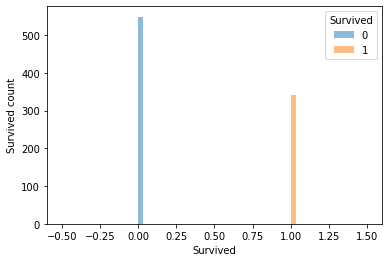

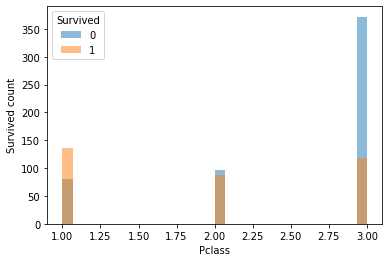

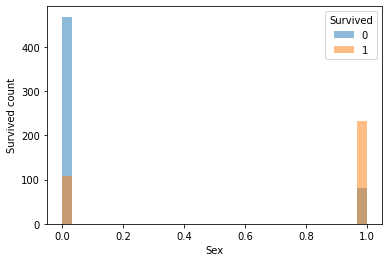

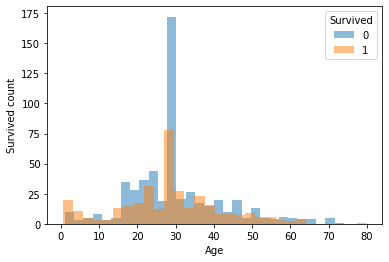

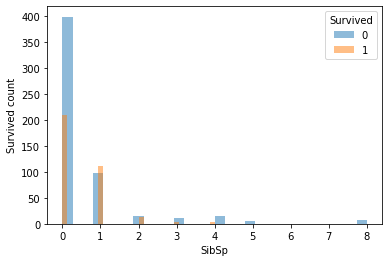

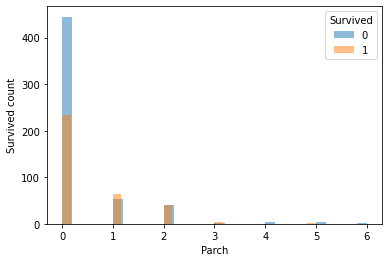

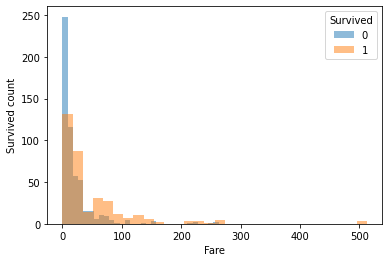

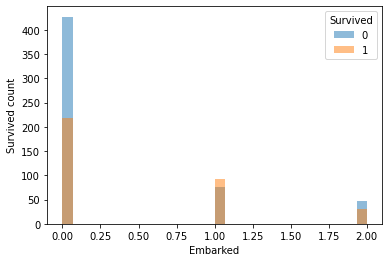

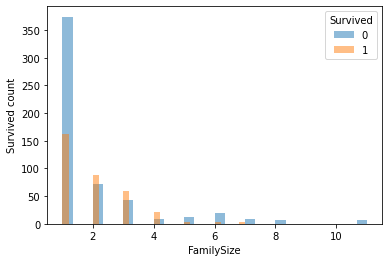

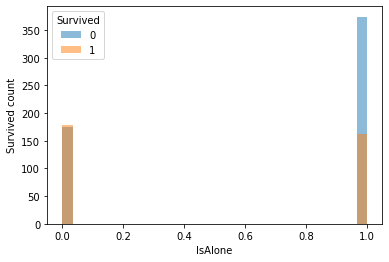

++++++++++++++++++++++
42_tidycol_tidy
++++++++++++++++++++++


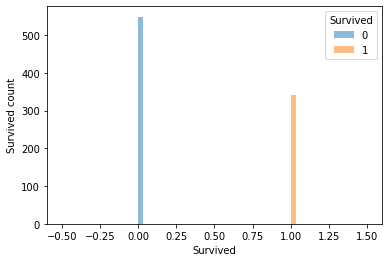

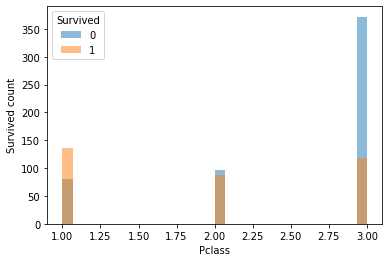

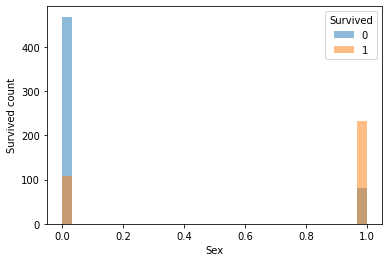

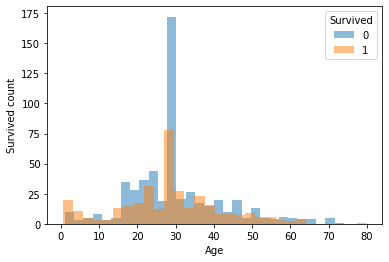

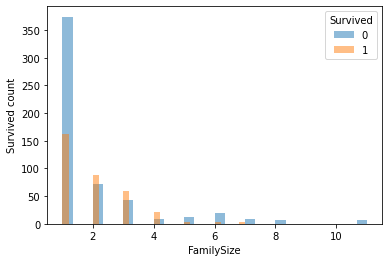

++++++++++++++++++++++
43_tidycol_with_cabin_prefix
++++++++++++++++++++++


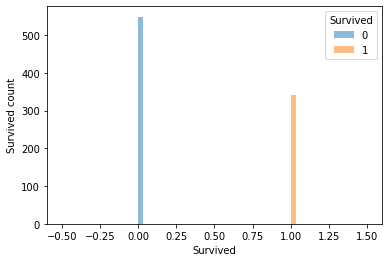

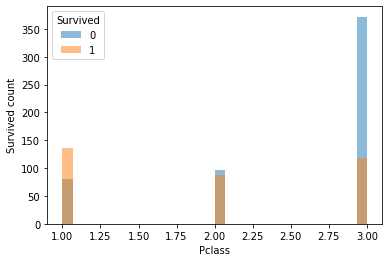

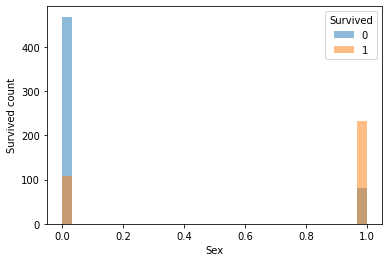

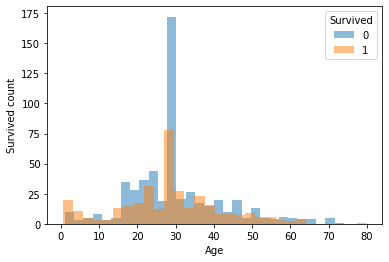

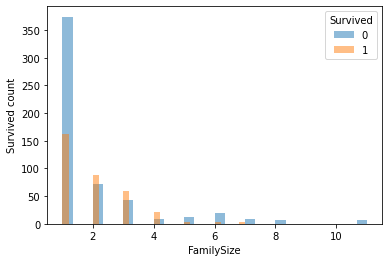

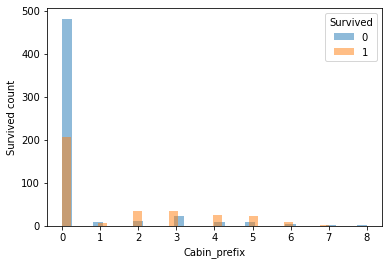

++++++++++++++++++++++
44_tidycol_with_cabin_prefix_with_embarked
++++++++++++++++++++++


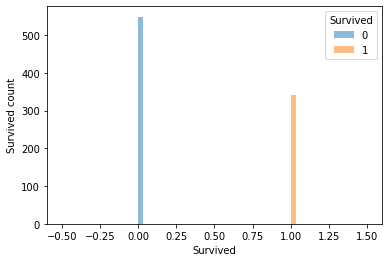

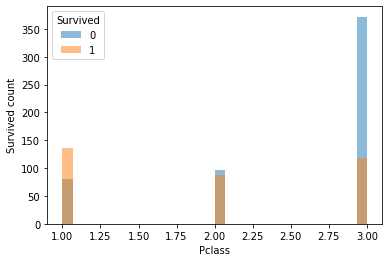

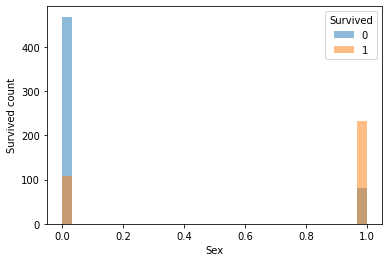

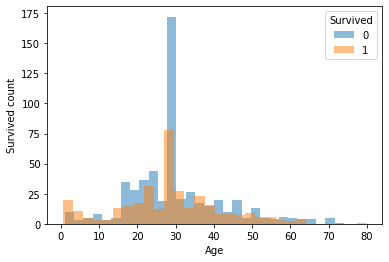

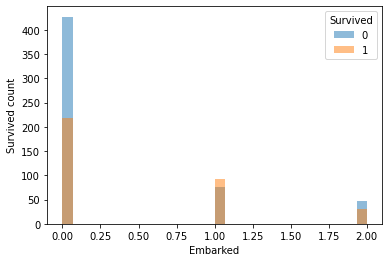

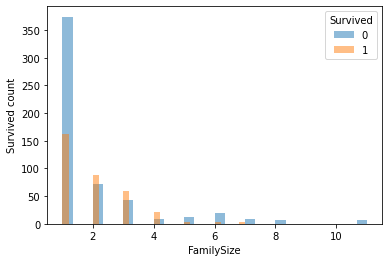

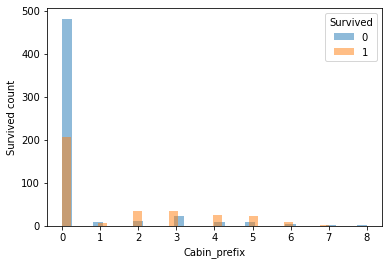

++++++++++++++++++++++
45_tidycol_with_cabin_prefix_with_embarked_with_fare
++++++++++++++++++++++


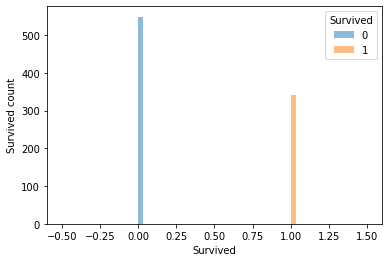

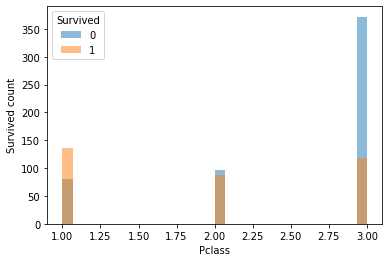

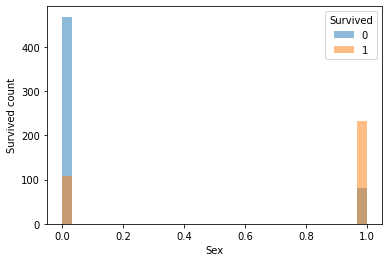

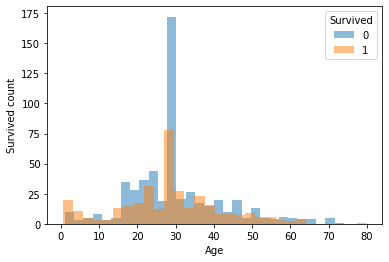

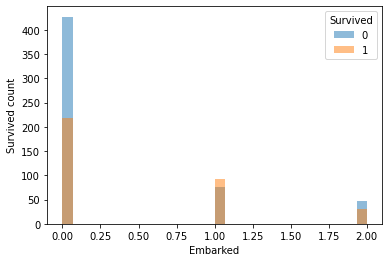

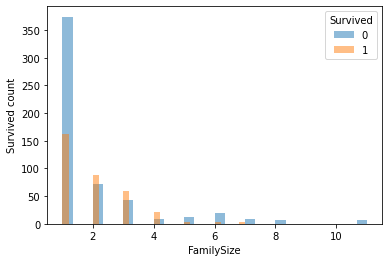

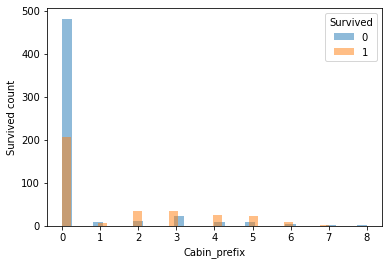

++++++++++++++++++++++
46_tidycol_many_correlation
++++++++++++++++++++++


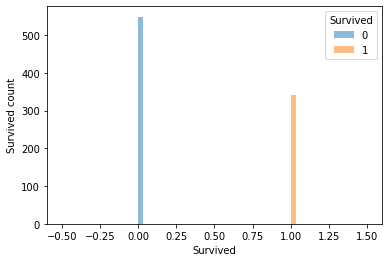

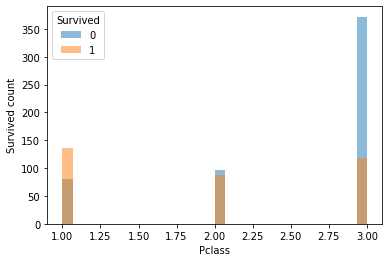

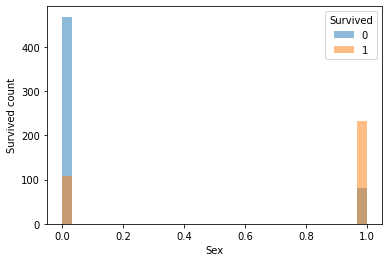

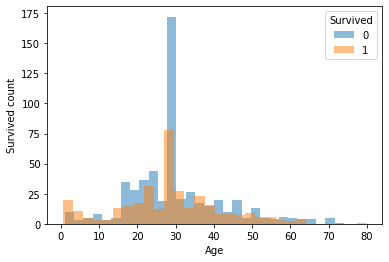

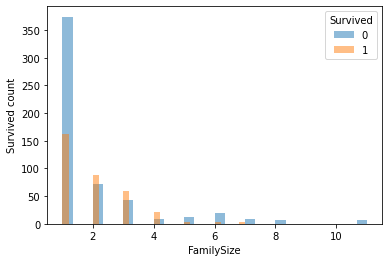

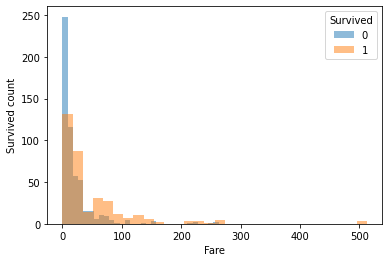

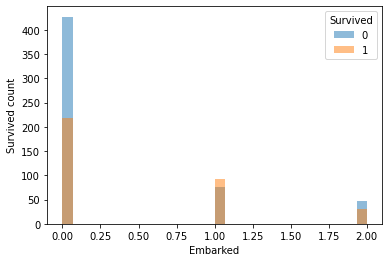

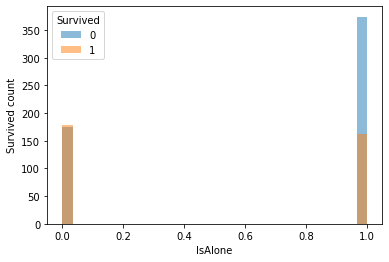

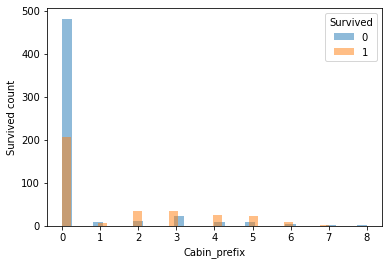

++++++++++++++++++++++
47_tidycol_many_correlation_with_sibsp_parch
++++++++++++++++++++++


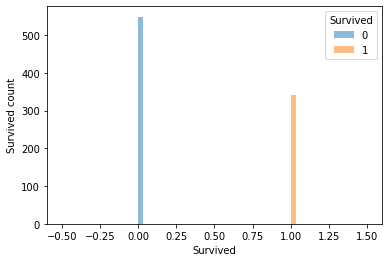

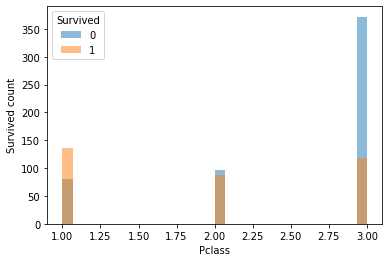

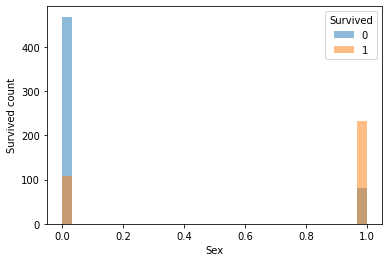

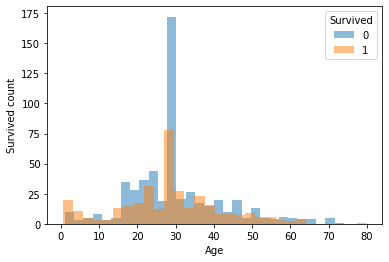

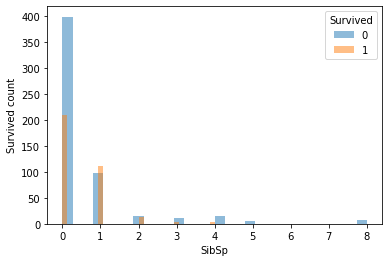

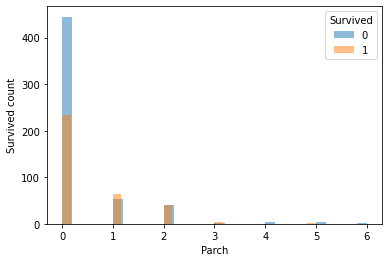

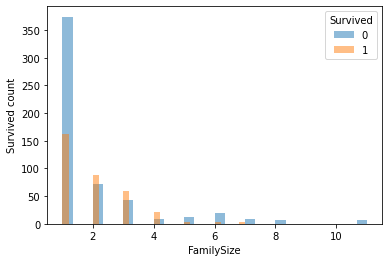

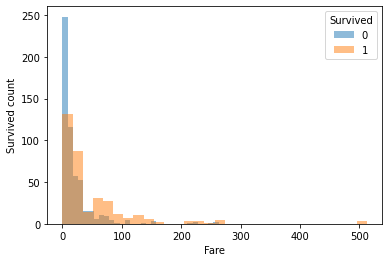

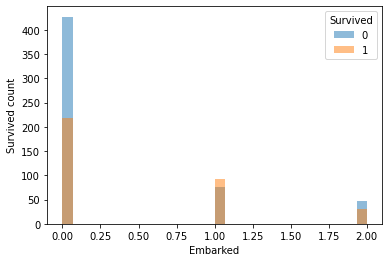

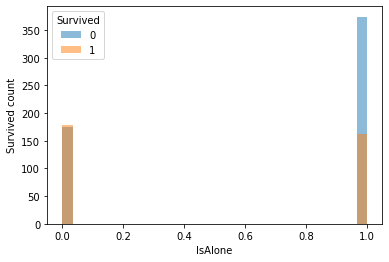

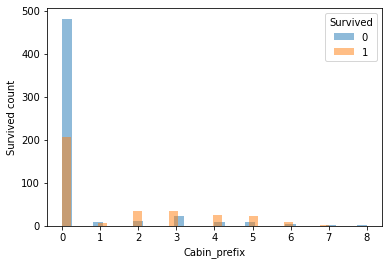

++++++++++++++++++++++
48_tidycol_many_correlation_cate_plus
++++++++++++++++++++++


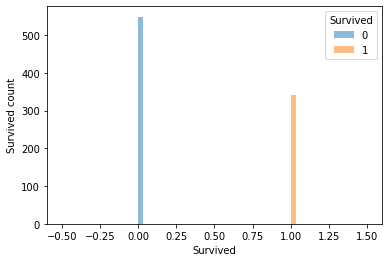

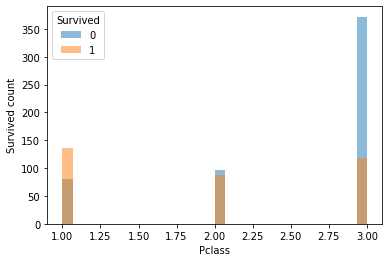

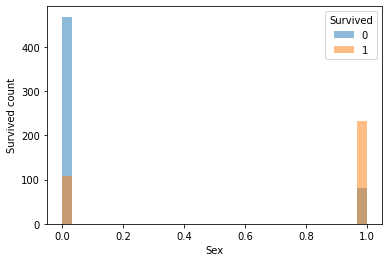

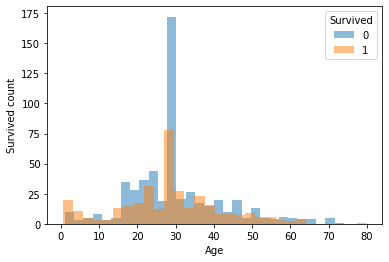

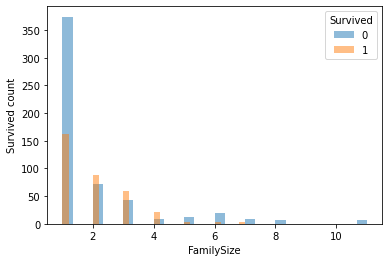

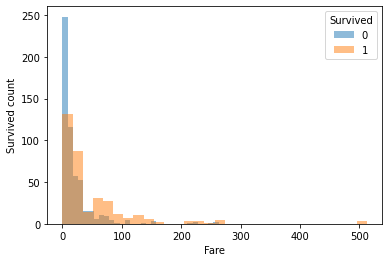

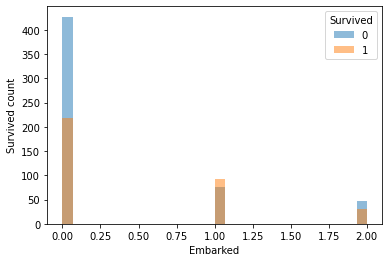

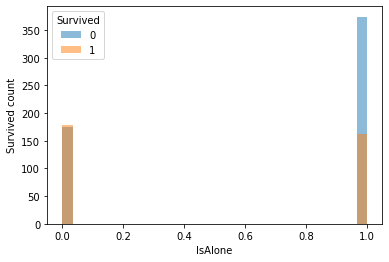

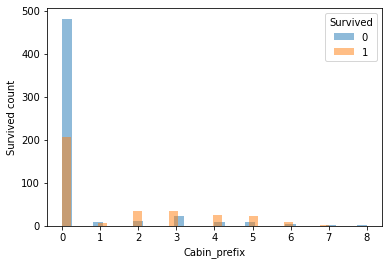

In [275]:
###
# ヒストグラムを描画して解析する
#

logic_names = [
    '41_tidycol_base',
    '42_tidycol_tidy',
    '43_tidycol_with_cabin_prefix',
    '44_tidycol_with_cabin_prefix_with_embarked',
    '45_tidycol_with_cabin_prefix_with_embarked_with_fare',
    '46_tidycol_many_correlation',
    '47_tidycol_many_correlation_with_sibsp_parch',
    '48_tidycol_many_correlation_cate_plus',
]
results = {}

import seaborn as sns
import matplotlib.pyplot as plt

for logic_name in logic_names:
    print('++++++++++++++++++++++')
    print(logic_name)
    print('++++++++++++++++++++++')

    data, train, test, categorical_features = eval('func_' + logic_name)()
    
    # prot
#     pd.plotting.scatter_matrix(data, figsize=(20, 20))
    for col in data.columns.values:
        plt.hist(data.loc[data['Survived'] == 0, col] , bins=30, alpha=0.5, label='0')
        plt.hist(data.loc[data['Survived'] == 1, col], bins=30, alpha=0.5, label='1')
        plt.xlabel(col)
        plt.ylabel('Survived count')
        plt.legend(title='Survived')
        plt.show()
        
    

----------------
      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                               

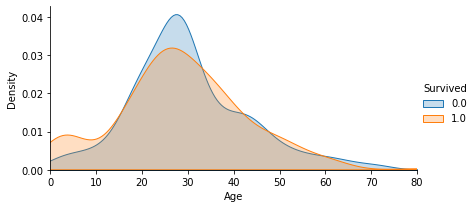